# ASSIGNMENT7_TEXT CLASSIFICATION

TEXT CLASSIFICATION : 
Text classification is the process of automatically categorizing or labeling text data into predefined categories or classes based on its content

## IMPORTING PACKAGES AND LOADING DATASET

In [48]:
#importing pandas
import pandas as pd
# Read data into df
df = pd.read_csv('TheSocialDilemma.csv')   
#displays first five columns
df.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,9/11/07 22:22,579942,288625,11610,False,9/16/20 20:55,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,9/11/07 22:22,579942,288625,11610,False,9/16/20 20:53,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,9/6/09 10:36,257,204,475,False,9/16/20 20:51,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,12/28/12 21:45,11782,1033,12219,True,9/16/20 20:51,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,5/28/12 20:43,278,387,5850,False,9/16/20 20:51,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


## BAR CHART

<Axes: xlabel='user_verified'>

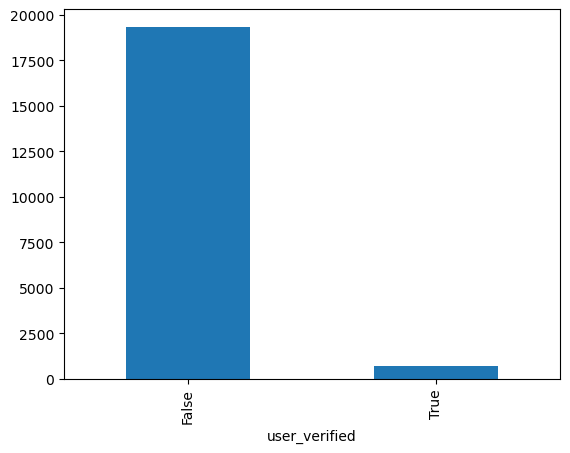

In [49]:
# Plot the bar chart
df['user_verified'].value_counts().sort_index().plot(kind='bar')


## BAR PLOT

<Axes: xlabel='Sentiment'>

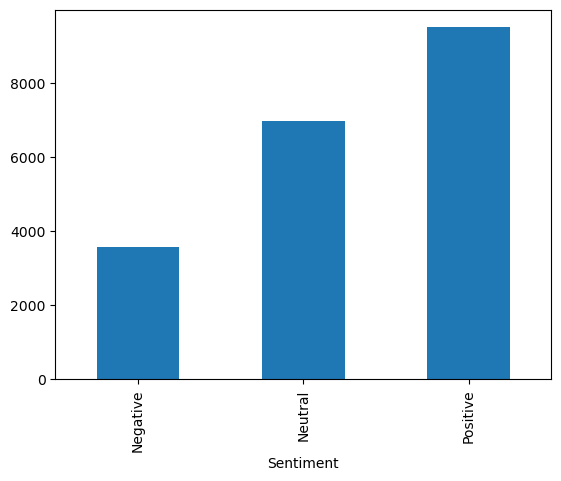

In [50]:
# Plot the bar chart
df['Sentiment'].value_counts().sort_index().plot(kind='bar')


## FUNCTION TO REMOVE ODD WORDS
Odd words refer to words that are uncommon or rare within a given context. These are words that occur infrequently compared to other words in the text.Removing odd words from text data can be beneficial for Noise Reduction,Dimensionality Reduction, Improved Generalization, Enhanced Interpretability.

In [51]:
#importing html and regex
import html
import re
def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


## DATA CLEANING
Data cleaning is the process of preparing and transforming raw data into a clean and structured format suitable for analysis or other downstream tasks. It involves identifying and correcting errors, inconsistencies, and inaccuracies in the data. 

In [52]:
# Selecting only the 'user_description' and 'text','Sentiment' columns
df = df[['user_description', 'text', 'Sentiment']]

# Dropping rows with NaN values
df = df.dropna()

# Combining the 'user_description' and 'text' columns into a single 'title' column
df['title'] = df['text'] + ' ' + df['user_description']

# Dropping the 'user_description' and 'text' columns after combining them into 'title'
df = df.drop(columns=['user_description', 'text'])

# Applying the clean function (assuming you have defined it somewhere)
df['title'] = df['title'].apply(clean)

# Filtering out rows where the length of 'title' is less than 50
df = df[df['title'].str.len() > 50]

# Displaying a sample of the resulting DataFrame
df.sample(2)


,Sentiment,title
4116,Positive,Ironic sharing this after watching the film si...
18046,Neutral,Just finished watching this documentary on Net...


## TRAIN TEST AND SPLIT

In [54]:
#Importing train_test_split from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

#Splitting the 'title' column (features) and the 'Sentiment' column (target) 
X_train, X_test, Y_train, Y_test = train_test_split(df['title'],
                                                    df['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Sentiment'])

#Printing the sizes of the training and testing data
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])


Size of Training Data  14902
Size of Test Data  3726


## TRAINING MODEL USIN SVM 

In [55]:
#importing functions and classes from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
#Creating an instance of TfidfVectorizer with specified parameters
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)


## BUILDING THE MODEL

In [56]:
#Importing the LinearSVC class from the sklearn.svm module
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)


/Users/likithareddykotla/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

## TESTING AND ACCURACY OF THE MODEL

In [59]:
#Importing the accuracy_score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score

Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))


Accuracy Score :  0.7359098228663447


## DUMMY CLASSIFIER
A dummy classifier is a simple baseline classifier used in machine learning for comparison purposes.Unlike traditional classifiers, a dummy classifier makes predictions using simple rules that are unrelated to the actual data.

In [60]:
#importing the DummyClassifier class from the sklearn.dummy module
from sklearn.dummy import DummyClassifier
#initializing and Training the Dummy Classifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score :  0.4758454106280193


## CONFUSION MATRIX
A confusion matrix is a table that is often used to evaluate the performance of a classification model. It summarizes the performance of a classification algorithm by displaying the number of correct and incorrect predictions for each class compared to the actual class labels in the dataset.

In [61]:
from sklearn.metrics import confusion_matrix

# Assuming  Y_test and Y_pred defined
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)



[[ 345  147  171]
 [  67  977  246]
 [  90  263 1420]]


array([[ 345,  147,  171],
       [  67,  977,  246],
       [  90,  263, 1420]])

## PLOTTING CONFUSION MATRIX

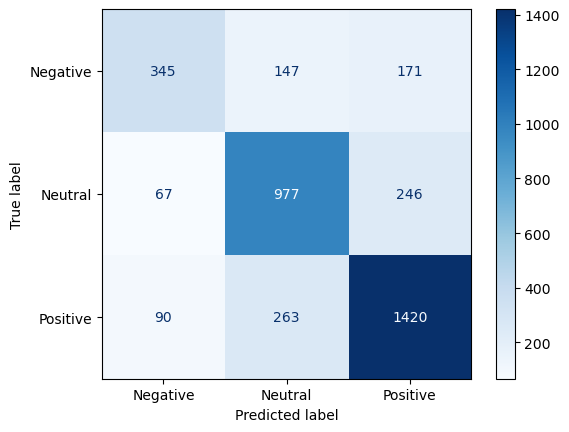

In [62]:
#importing ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Get the predicted labels
predicted_labels = model1.predict(X_test_tf)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()


## CLASSIFICATION REPORT

In [63]:
#importing the Classification Report Function
from sklearn.metrics import classification_report
#classification_report function to generate a text report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

    Negative       0.69      0.52      0.59       663
     Neutral       0.70      0.76      0.73      1290
    Positive       0.77      0.80      0.79      1773

    accuracy                           0.74      3726
   macro avg       0.72      0.69      0.70      3726
weighted avg       0.73      0.74      0.73      3726



## DOWNSAMPLING

In [64]:
# Filter bug reports with sentiment Positive and sample 4000 rows from it
df_sampleP3 = df[df['Sentiment'] == 'Positive'].sample(n=4000, random_state=123)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['Sentiment'] != 'Positive']

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['Sentiment'].value_counts()


Sentiment
Neutral     6449
Positive    4000
Negative    3316
Name: count, dtype: int64

## REPEATING EVERYTHING

In [65]:
# Loading the balanced dataframe

df = df_balanced[['title', 'Sentiment']]
df = df.dropna()

# Step 1 - Data Preparation

df['title'] = df['title'].apply(clean)

# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['title'],
                                                    df['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Sentiment'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

# Step 3 - Training the Machine Learning model

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

# Step 4 - Model Evaluation

X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)
print('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Size of Training Data  11012
Size of Test Data  2753
Accuracy Score :  0.729749364329822
              precision    recall  f1-score   support

    Negative       0.69      0.57      0.63       663
     Neutral       0.76      0.84      0.80      1290
    Positive       0.71      0.68      0.69       800

    accuracy                           0.73      2753
   macro avg       0.72      0.70      0.71      2753
weighted avg       0.73      0.73      0.73      2753



/Users/likithareddykotla/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## GRID SEARCH, SVM NOT LINEARSVM

In [67]:
#importing Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
# Flag that determines the choice of SVC (True) and LinearSVC (False)
runSVC = True
# Loading the dataframe
df = pd.read_csv('TheSocialDilemma.csv')
#df = df.drop(columns=['Duplicated_issue'])
df = df[['text', 'user_description', 'Sentiment']]
df = df.dropna()
df['title'] = df['text'] + df['user_description']
df = df.drop(columns=['text', 'user_description'])
# Step 1 - Data Preparation
df['title'] = df['title'].apply(clean)
df = df[df['title'].str.len() > 50]
if (runSVC):
    # Sample the data when running SVC to ensure reasonable run-times
    df = df.groupby('Sentiment', as_index=False).apply(pd.DataFrame.sample,
                                                       random_state=42,
                                                       frac=.2)
# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['title'],
                                                    df['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Sentiment'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])
# Step 3 - Training the Machine Learning model
tfidf = TfidfVectorizer(stop_words="english")
if (runSVC):
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = {
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), ('model', model)])
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(X_train, Y_train)
best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

best_model = gridSearchProcessor.best_estimator_

# Step 4 - Model Evaluation

Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Size of Training Data  2980
Size of Test Data  745
Best alpha parameter identified by grid search  {'model__C': 1, 'model__kernel': 'linear', 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 6)}
Best result identified by grid search  0.6577181208053691
Accuracy Score -  0.6724832214765101
              precision    recall  f1-score   support

    Negative       0.63      0.31      0.41       133
     Neutral       0.64      0.71      0.67       258
    Positive       0.71      0.78      0.74       354

    accuracy                           0.67       745
   macro avg       0.66      0.60      0.61       745
weighted avg       0.67      0.67      0.66       745

